EX 8.1:
 A thin plate is initially at a uniform temeprature of 200 C. at a certain time t=0 the temperature of east side of the plate is suddenly reduced to 0 C. the other surface is insulated. Use explicit finite volume method in conjuction with a suitable time step size to calculate the transient temperature distrubtion of the slab and compare it with the analytical solution at time (i) t=40 s,(ii) t=80 s and (iii) t=120 s.
 Recalculate the numerical solution using a time step size equal to the limit given by (8.13) for t=40 s and compare the results with the analytical solution. Data are L=2cm ,k=10W/m/K and rho c=10*10^6 J/m^3/K.

In [1]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

[199.987896   199.82371212 197.94696203 182.7131064  103.47015852]
[199.72195137 198.24960935 190.2083435  157.99120254  69.81802925]
[198.68890521 194.74318925 179.86971782 138.34098541  54.85347935]


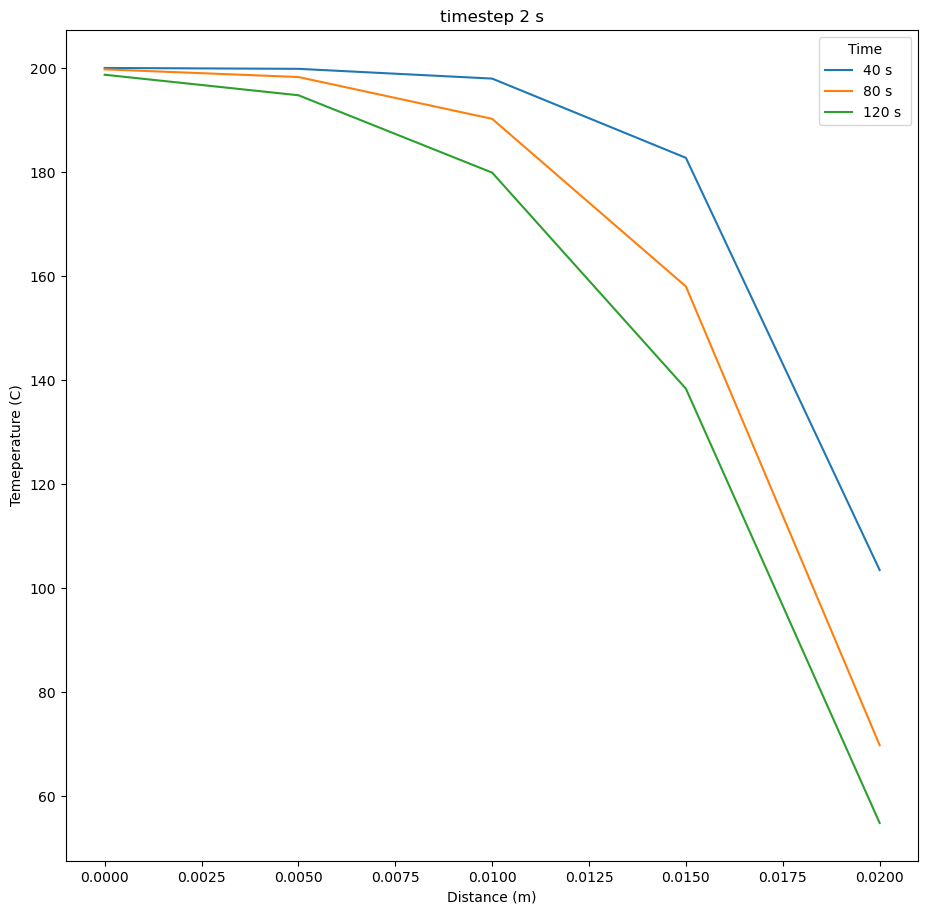

In [2]:
def diffusion(nx,tf,dt,x):
    
    #given information about the rod
    
    rhoc=10*10**6    
    k=10
    #we will solve for L=.05
    L=.05

    dx=L/nx
    
    nt=tf/dt
    
    lambdax=(k*dt)/(rhoc*dx**2)
    
    
    T=numpy.zeros(nx) 
    T[:]=200
    TN=T.copy() #temp distrubtion at time =0


    for i in range(int(nt)):
        TN=T.copy()
        
        T[1:-1]= lambdax * (TN[2:] - 2 * TN[1:-1] + TN[0:-2] ) + TN[1:-1]
        
        #boundary conditions

        T[0] = lambdax * ( TN[1] - TN[0] ) + TN[0] 
        
        T[-1] = lambdax * (-3 * TN[-1] + TN[-2] ) + TN[-1]
    

    if x==1:
        print(T)

    X=numpy.linspace(0,.02,nx)
    plt.title(f"timestep {dt} s")
    plt.xlabel("Distance (m)")
    plt.ylabel("Temeperature (C)")
    plt.plot(X,T,label=dx)

plt.figure(figsize=(11,11),dpi=100)
diffusion(5,40,2,1)
diffusion(5,80,2,1)
diffusion(5,120,2,1)
legend=plt.legend(["40 s ","80 s ","120 s "])
legend.set_title("Time")


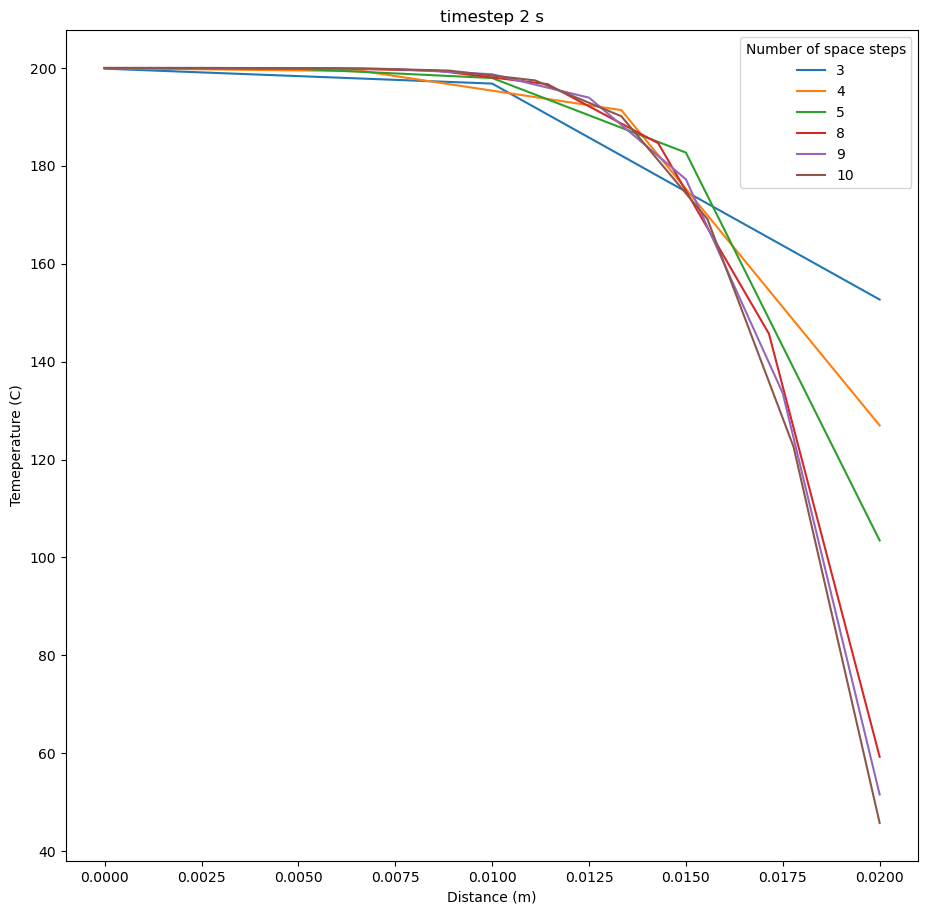

In [3]:
plt.figure(figsize=(11,11),dpi=100)
diffusion(3,40,2,0)
diffusion(4,40,2,0)
diffusion(5,40,2,0)
diffusion(8,40,2,0)
diffusion(9,40,2,0)
diffusion(10,40,2,0)
legend=plt.legend(["3","4","5","8","9","10"])
legend.set_title("Number of space steps")

We define a function that takes three parameter one for number of space steps,one for the time u want to calculate the temeperature distrubtion at and one for the number of timesteps.

In our function we make a a matrix filled with zeros using numpy.zeros() command 
then we fill it with the temeperature distribution at time =0 which is given by the problem 

We then make a copy of this matrix and we will make the original matrix change with time 

first figure shows comparison of different times with the same number of timesteps and space steps.

second figure shows comparison of different number spacesteps with the same timestep dt=2 and calculated at the same time t=40 s.

